# 读取EDF数据

In [21]:
import mne
import matplotlib.pyplot as plt
import numpy as np
#读取数据到raw变量
#fname = r'./testdata/20231027174827_Female-3_edfFiltered.easy_converted_.edf'
raw = mne.io.read_raw_edf(r"./testdata/20231027174827_Female-3_edfFiltered.easy_converted_.edf")
ch_names = ['P8','T8','CP6','FC6','F8','F4','C4','P4','AF4','Fp2','Fp1','AF3','Fz','FC2','Cz','CP2','PO3','O1','Oz','O2','PO4','Pz','CP1','FC1','P3','C3','F3','F7','FC5','CP5','T7','P7']
# 选择前面的 32 个通道
raw2 = raw.pick_channels(ch_names[:32])
#raw的数据访问方式如下：
# data,times=raw[picks,time_slice]
#picks:是根据条件挑选出来的索引；
#time_slice:时间切片
#想要获取raw中所有数据，以下两种方式均可：
#data,times=raw[:]
#data,times=raw[:,:]

Extracting EDF parameters from D:\P\EEG_Process_Project\testdata\20231027174827_Female-3_edfFiltered.easy_converted_.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\Keren\AppData\Local\Temp\ipykernel_16104\523659363.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in an error because the following channel names are missing:
['P8', 'T8', 'CP6', 'FC6', 'F8', 'F4', 'C4', 'P4', 'AF4', 'Fp2', 'Fp1', 'AF3', 'Fz', 'FC2', 'Cz', 'CP2', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'Pz', 'CP1', 'FC1', 'P3', 'C3', 'F3', 'F7', 'FC5', 'CP5', 'T7', 'P7']
Either fix your included names or explicitly pass ordered=False.
  raw2 = raw.pick_channels(ch_names[:32])


ValueError: No channels match the selection.

In [20]:

locs_info_path = "./figure/Loc_NE.loc"
montage = mne.channels.read_custom_montage(locs_info_path)
new_chan_names = np.loadtxt(locs_info_path,dtype=str,usecols=3)
old_chan_names = raw.info["ch_names"]
chan_names_dict = {old_chan_names[i]:new_chan_names[i] for i in range(32)}
 
#更新数据的电极名字（不是标准名无法运行）
raw.rename_channels(chan_names_dict)
#输入电极位置信息
raw.set_montage(montage)
#陷波滤波
#raw = raw.notch_filter(freqs=(50))
#带通滤波
raw = raw.filter(l_freq=3, h_freq=35)
fig = raw.plot(duration=5, n_channels=32, clipping=None) 
# fig.canvas.key_press_event('a')
plt.show()
#原始数据功率谱图（如果有多种类型的channel_type有个图）
raw.plot_psd(average=True)
plt.show()
#电极位置图
raw.plot_sensors(ch_type='eeg', show_names=True)
plt.show()
#原始数据拓扑图
raw.plot_psd_topo()
plt.show()
#绘制ICA成分地形图
ica = mne.preprocessing.ICA(n_components=12, random_state=97, max_iter=800)
ica.fit(inst=raw)
ica.plot_components()
plt.show()

IndexError: index 32 is out of bounds for axis 0 with size 32

In [22]:
import mne
import matplotlib.pyplot as plt
import numpy as np

# 读取数据到 raw 变量
raw = mne.io.read_raw_edf(r"./testdata/20231027174827_Female-3_edfFiltered.easy_converted_.edf", preload=True)

# 打印原始通道名
print("Original channel names:", raw.ch_names)

# 如果原始通道名与 ch_names 不匹配，根据需要进行调整
# ch_names = ['P8', 'T8', 'CP6', ...]  # 确保通道名的顺序和大小写都正确

# 选择前面的 32 个通道
raw.pick_channels(ch_names[:32])

# 绘制数据，duration 为显示的时间长度，n_channels 为显示的通道数
raw.plot(duration=5, n_channels=32, clipping=None)
plt.show()


Extracting EDF parameters from D:\P\EEG_Process_Project\testdata\20231027174827_Female-3_edfFiltered.easy_converted_.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 48999  =      0.000 ...    97.998 secs...
Original channel names: ['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch6', 'Ch7', 'Ch8', 'Ch9', 'Ch10', 'Ch11', 'Ch12', 'Ch13', 'Ch14', 'Ch15', 'Ch16', 'Ch17', 'Ch18', 'Ch19', 'Ch20', 'Ch21', 'Ch22', 'Ch23', 'Ch24', 'Ch25', 'Ch26', 'Ch27', 'Ch28', 'Ch29', 'Ch30', 'Ch31', 'Ch32', 'X', 'Y', 'Z']
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\Keren\AppData\Local\Temp\ipykernel_16104\3982678497.py:15: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in an error because the following channel names are missing:
['P8', 'T8', 'CP6', 'FC6', 'F8', 'F4', 'C4', 'P4', 'AF4', 'Fp2', 'Fp1', 'AF3', 'Fz', 'FC2', 'Cz', 'CP2', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'Pz', 'CP1', 'FC1', 'P3', 'C3', 'F3', 'F7', 'FC5', 'CP5', 'T7', 'P7']
Either fix your included names or explicitly pass ordered=False.
  raw.pick_channels(ch_names[:32])


ValueError: No channels match the selection.

In [35]:
import mne
import matplotlib.pyplot as plt
import numpy as np
#读取数据到raw变量
#fname = r'./testdata/20231027174827_Female-3_edfFiltered.easy_converted_.edf'
raw = mne.io.read_raw_edf(r"./testdata/20231027174827_Female-3_edfFiltered.easy_converted_.edf",preload=True)
ch_names = ['P8','T8','CP6','FC6','F8','F4','C4','P4','AF4','Fp2','Fp1','AF3','Fz','FC2','Cz','CP2','PO3','O1','Oz','O2','PO4','Pz','CP1','FC1','P3','C3','F3','F7','FC5','CP5','T7','P7']
# 选择前 32 个通道
channels_to_keep = raw.ch_names[:32]
raw_subset = raw.copy().pick_channels(channels_to_keep)

Extracting EDF parameters from D:\P\EEG_Process_Project\testdata\20231027174827_Female-3_edfFiltered.easy_converted_.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 48999  =      0.000 ...    97.998 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Extracting EDF parameters from D:\P\EEG_Process_Project\testdata\20231027174827_Female-3_edfFiltered.easy_converted_.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 48999  =      0.000 ...    97.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 3.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 825 samples (1.650 s)


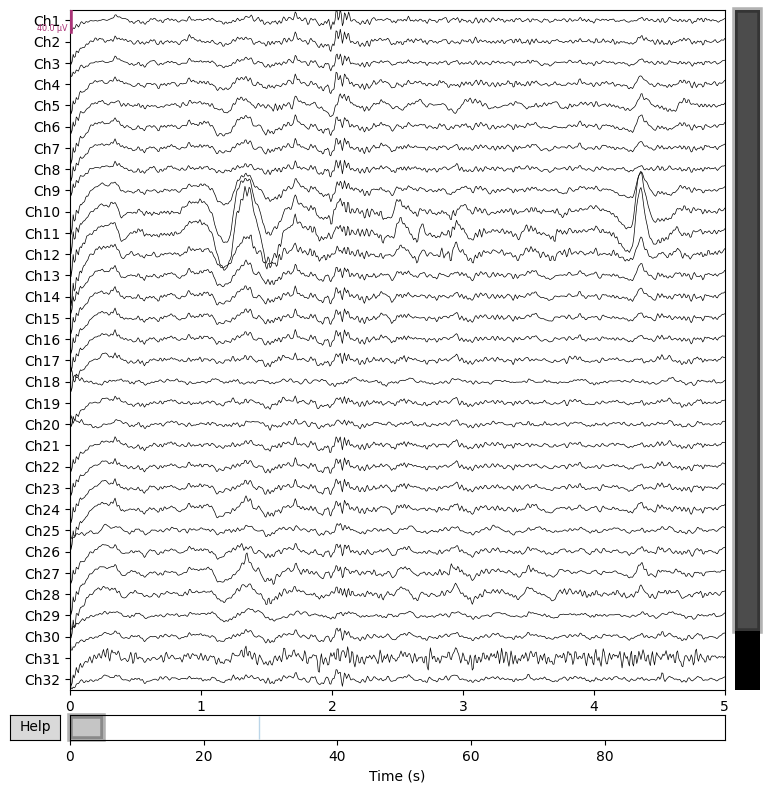

In [37]:
import mne
import matplotlib.pyplot as plt
raw = mne.io.read_raw_edf(r"./testdata/20231027174827_Female-3_edfFiltered.easy_converted_.edf",preload=True)
ch_names = ['P8','T8','CP6','FC6','F8','F4','C4','P4','AF4','Fp2','Fp1','AF3','Fz','FC2','Cz','CP2','PO3','O1','Oz','O2','PO4','Pz','CP1','FC1','P3','C3','F3','F7','FC5','CP5','T7','P7']
raw = raw.filter(l_freq=3, h_freq=35)
fig = raw.plot(duration=5, n_channels=32, clipping=None) 
plt.show()

Extracting EDF parameters from D:\P\EEG_Process_Project\testdata\20231027174827_Female-3_edfFiltered.easy_converted_.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 48999  =      0.000 ...    97.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 3.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 825 samples (1.650 s)


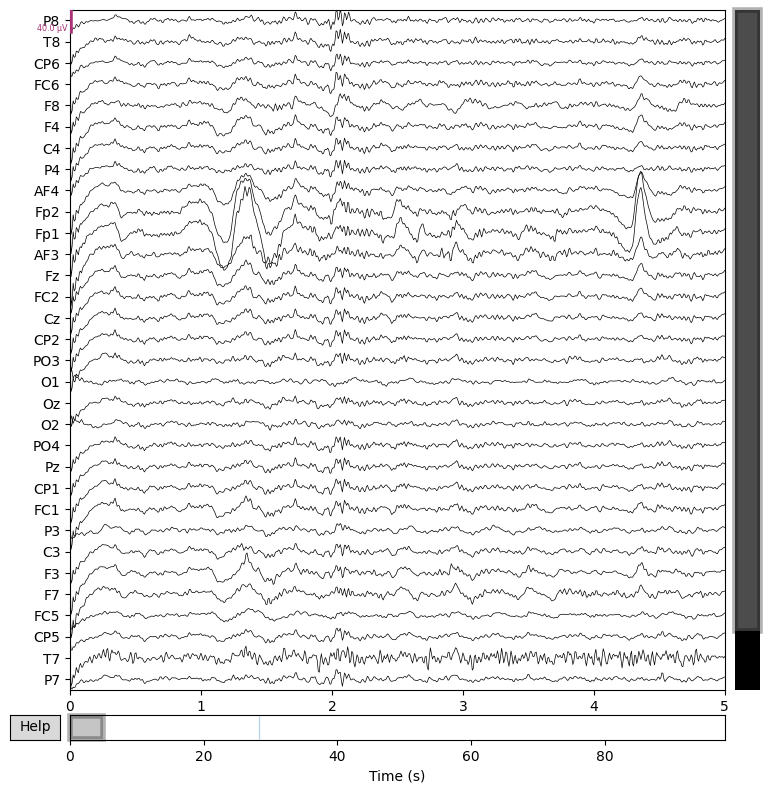

In [57]:
import mne
import matplotlib.pyplot as plt

raw = mne.io.read_raw_edf(r"./testdata/20231027174827_Female-3_edfFiltered.easy_converted_.edf", preload=True)
# raw.drop_channels([ 'X', 'Y', 'Z'])

raw.filter(l_freq=3, h_freq=35)
mapping={'Ch1':'P8', 'Ch2':'T8', 'Ch3':'CP6', 'Ch4':'FC6', 'Ch5':'F8', 'Ch6':'F4', 'Ch7':'C4', 'Ch8':'P4', 'Ch9':'AF4', 'Ch10':'Fp2', 'Ch11':'Fp1', 'Ch12':'AF3', 'Ch13':'Fz', 'Ch14':'FC2', 'Ch15':'Cz', 'Ch16':'CP2', 'Ch17':'PO3', 'Ch18':'O1', 'Ch19':'Oz', 'Ch20':'O2','Ch21':'PO4', 'Ch22':'Pz', 'Ch23':'CP1', 'Ch24':'FC1', 'Ch25':'P3', 'Ch26':'C3', 'Ch27':'F3', 'Ch28':'F7', 'Ch29':'FC5', 'Ch30':'CP5', 'Ch31':'T7','Ch32':'P7'}
raw.rename_channels(mapping)
raw.plot(duration=5, n_channels=32, clipping=None)
plt.show()

# ch_names = ['P8','T8','CP6','FC6','F8','F4','C4','P4','AF4','Fp2','Fp1','AF3','Fz','FC2','Cz','CP2','PO3','O1','Oz','O2','PO4','Pz','CP1','FC1','P3','C3','F3','F7','FC5','CP5','T7','P7']
# ch_types = ['eeg'] * 32
# info = mne.create_info(ch_names, ch_types=ch_types, sfreq=250)
# # 绘制指定通道的数据
# raw.plot(duration=5, n_channels=32, clipping=None)
# plt.show()


In [13]:
import mne
input_fname = r'D:/P/EEG_Process_Project/NewDataSet/Female1-post.set'
mne.io.read_raw_eeglab(input_fname,
                       eog=(),
                       preload=True,
                       uint16_codec=None,
                       verbose=None)


Reading D:\P\EEG_Process_Project\NewDataSet\Female1-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...


C:\Users\Keren\AppData\Local\Temp\ipykernel_1232\2297929323.py:3: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  mne.io.read_raw_eeglab(input_fname,


<RawEEGLAB | Female1-post.fdt, 32 x 34500 (69.0 s), ~8.5 MB, data loaded>

In [2]:
import mne
from sklearn.cluster import KMeans
import numpy as np
import os
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# 设置文件路径
data_folder = "D:/P/EEG_Process_Project/NewDataSet/"
file_names = ["Female1-post.set", "Female2-post.set", "Female3-post.set","Data1-post.set","Data2-post.set","Male1-post.set","Female7-post.set","Female8-post.set","Male2-post.set","Male4-post.set","Male5-post.set","Male6-post.set"]  # 假设你有多个文件，这里需要列出所有的文件名
# 用于存储每段 EEG 数据的列表
eeg_data_list = []

# 读取每个文件中的 EEG 数据
for file_name in file_names:
    file_path = os.path.join(data_folder, file_name)
    raw = mne.io.read_raw_eeglab(file_path, preload=True)
    
    # 提取 EEG 数据，假设前 32 个通道是 EEG 通道
    eeg_data = raw.get_data()[:32, :]
    eeg_data_list.append(eeg_data)
# 将列表中的 EEG 数据合并为一个 numpy 数组
all_eeg_data = np.concatenate(eeg_data_list, axis=1)

# 将数据转置，使得每一列对应一个样本，每一行对应一个特征
all_eeg_data = all_eeg_data.T

# 使用 K-means 进行聚类，这里假设有两类
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(all_eeg_data)

# 使用 t-SNE 进行降维
tsne = TSNE(n_components=2, random_state=42)
eeg_tsne = tsne.fit_transform(all_eeg_data)

# 绘制散点图
plt.figure(figsize=(8, 6))
colors = ['r', 'b']
for i in range(n_clusters):
    plt.scatter(eeg_tsne[labels == i, 0], eeg_tsne[labels == i, 1], c=colors[i], label=f'Cluster {i}')

plt.title('t-SNE Visualization of EEG Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

Reading D:\P\EEG_Process_Project\NewDataSet\Female1-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Female2-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Female3-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Data1-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Data2-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Male1-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Female7-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Female8-post.fdt


C:\Users\Keren\AppData\Local\Temp\ipykernel_20676\3674051798.py:16: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\Local\Temp\ipykernel_20676\3674051798.py:16: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\Local\Temp\ipykernel_20676\3674051798.py:16: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_r

Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Male2-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Male4-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Male5-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Male6-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...


C:\Users\Keren\AppData\Local\Temp\ipykernel_20676\3674051798.py:16: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\Local\Temp\ipykernel_20676\3674051798.py:16: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\Local\Temp\ipykernel_20676\3674051798.py:16: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_r

KeyboardInterrupt: 

In [6]:
import mne
from sklearn.cluster import KMeans
import numpy as np
import os

# 设置文件路径
data_folder = "D:/P/EEG_Process_Project/NewDataSet/"
file_names = ["Female1-post.set", "Female2-post.set", "Female3-post.set","Data1-post.set","Data2-post.set","Male1-post.set","Female7-post.set","Female8-post.set","Male2-post.set","Male4-post.set","Male5-post.set","Male6-post.set"]  # 假设你有多个文件，这里需要列出所有的文件名

# 用于存储每段 EEG 数据的列表和每个文件对应的聚类标签
eeg_data_list = []
file_labels = []

# 读取每个文件中的 EEG 数据
for file_name in file_names:
    file_path = os.path.join(data_folder, file_name)
    raw = mne.io.read_raw_eeglab(file_path, preload=True)
    
    # 提取 EEG 数据，假设前 32 个通道是 EEG 通道
    eeg_data = raw.get_data()[:32, :]
    eeg_data_list.append(eeg_data)

# 将列表中的 EEG 数据合并为一个 numpy 数组
all_eeg_data = np.concatenate(eeg_data_list, axis=1)

# 将数据转置，使得每一列对应一个样本，每一行对应一个特征
all_eeg_data = all_eeg_data.T

# 使用 K-means 进行聚类
n_clusters = 2
max_iter = 500
kmeans = KMeans(n_clusters=n_clusters,random_state=42,max_iter = max_iter,n_init=50)
labels = kmeans.fit_predict(all_eeg_data)

# 将文件名和聚类标签对应起来
file_labels = dict(zip(file_names, labels))

# 输出每个文件对应的聚类标签
for file_name, label in file_labels.items():
    print(f"{file_name}: Cluster Label {label}")


Reading D:\P\EEG_Process_Project\NewDataSet\Female1-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Female2-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Female3-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Data1-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Data2-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Male1-post.fdt


C:\Users\Keren\AppData\Local\Temp\ipykernel_20676\3637746979.py:17: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\Local\Temp\ipykernel_20676\3637746979.py:17: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\Local\Temp\ipykernel_20676\3637746979.py:17: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_r

Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Female7-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Female8-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Male2-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Male4-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Male5-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Male6-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...


C:\Users\Keren\AppData\Local\Temp\ipykernel_20676\3637746979.py:17: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\Local\Temp\ipykernel_20676\3637746979.py:17: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\Local\Temp\ipykernel_20676\3637746979.py:17: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_r

Female1-post.set: Cluster Label 1
Female2-post.set: Cluster Label 1
Female3-post.set: Cluster Label 1
Data1-post.set: Cluster Label 1
Data2-post.set: Cluster Label 1
Male1-post.set: Cluster Label 1
Female7-post.set: Cluster Label 1
Female8-post.set: Cluster Label 1
Male2-post.set: Cluster Label 1
Male4-post.set: Cluster Label 1
Male5-post.set: Cluster Label 1
Male6-post.set: Cluster Label 1


In [ ]:
from sklearn.cluster import DBSCAN
from mne.io import read_raw_eeglab
import os
import numpy as np

# 设置文件路径
data_folder = "D:/P/EEG_Process_Project/NewDataSet/"
file_names = ["Female1-post.set", "Female2-post.set", "Female3-post.set","Data1-post.set","Data2-post.set","Male1-post.set","Female7-post.set","Female8-post.set","Male2-post.set","Male4-post.set","Male5-post.set","Male6-post.set"]  # 假设你有多个文件，这里需要列出所有的文件名

# 用于存储每段 EEG 数据的列表
eeg_data_list = []

# 读取每个文件中的 EEG 数据
for file_name in file_names:
    file_path = os.path.join(data_folder, file_name)
    raw = read_raw_eeglab(file_path, preload=True)
    
    # 提取 EEG 数据，假设前 32 个通道是 EEG 通道
    eeg_data = raw.get_data()[:32, :]
    eeg_data_list.append(eeg_data)

# 将列表中的 EEG 数据合并为一个 numpy 数组
all_eeg_data = np.concatenate(eeg_data_list, axis=1)

# 将数据转置，使得每一列对应一个样本，每一行对应一个特征
all_eeg_data = all_eeg_data.T

# 使用 DBSCAN 进行聚类
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(all_eeg_data)

# 输出聚类标签
print("Cluster Labels:", labels)


Reading D:\P\EEG_Process_Project\NewDataSet\Female1-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Female2-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Female3-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...


C:\Users\Keren\AppData\Local\Temp\ipykernel_18844\2615877576.py:16: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\Local\Temp\ipykernel_18844\2615877576.py:16: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\Local\Temp\ipykernel_18844\2615877576.py:16: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, 

Reading D:\P\EEG_Process_Project\NewDataSet\Data1-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Data2-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Male1-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Female7-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...


C:\Users\Keren\AppData\Local\Temp\ipykernel_18844\2615877576.py:16: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\Local\Temp\ipykernel_18844\2615877576.py:16: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\Local\Temp\ipykernel_18844\2615877576.py:16: RuntimeWarning: Data file name in EEG.data (TestData2-post.fdt) is incorrect, the file name must have changed on disk, using the correct file name (Data2-post.fdt).
  raw = read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\Local\Temp\ipykerne

Reading D:\P\EEG_Process_Project\NewDataSet\Female8-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Male2-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Male4-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Male5-post.fdt


C:\Users\Keren\AppData\Local\Temp\ipykernel_18844\2615877576.py:16: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\Local\Temp\ipykernel_18844\2615877576.py:16: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\Local\Temp\ipykernel_18844\2615877576.py:16: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, 

Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Male6-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...


C:\Users\Keren\AppData\Local\Temp\ipykernel_18844\2615877576.py:16: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


In [1]:
import mne
from sklearn.cluster import KMeans
import numpy as np
import os

# 设置文件路径
data_folder = "D:/P/EEG_Process_Project/NewDataSet/"
file_names = ["Female1-post.set", "Female2-post.set", "Female3-post.set","Data1-post.set","Data2-post.set","Male1-post.set","Female7-post.set","Female8-post.set","Male2-post.set","Male4-post.set","Male5-post.set","Male6-post.set"]  # 假设你有多个文件，这里需要列出所有的文件名

# 用于存储每段 EEG 数据的列表和每个文件对应的聚类标签
eeg_data_list = []
file_labels = []

# 读取每个文件中的 EEG 数据
for file_name in file_names:
    file_path = os.path.join(data_folder, file_name)
    raw = mne.io.read_raw_eeglab(file_path, preload=True)
    
    # 提取 EEG 数据，假设前 32 个通道是 EEG 通道
    eeg_data = raw.get_data()[:32, :]
    eeg_data_list.append(eeg_data)

# 将列表中的 EEG 数据合并为一个 numpy 数组
all_eeg_data = np.concatenate(eeg_data_list, axis=1)

# 将数据转置，使得每一列对应一个样本，每一行对应一个特征
all_eeg_data = all_eeg_data.T

all_eeg_data.shape

Reading D:\P\EEG_Process_Project\NewDataSet\Female1-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Female2-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Female3-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Data1-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...


C:\Users\Keren\AppData\Local\Temp\ipykernel_18776\337262648.py:17: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\Local\Temp\ipykernel_18776\337262648.py:17: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\Local\Temp\ipykernel_18776\337262648.py:17: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_

Reading D:\P\EEG_Process_Project\NewDataSet\Data2-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Male1-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Female7-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Female8-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...


C:\Users\Keren\AppData\Local\Temp\ipykernel_18776\337262648.py:17: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\Local\Temp\ipykernel_18776\337262648.py:17: RuntimeWarning: Data file name in EEG.data (TestData2-post.fdt) is incorrect, the file name must have changed on disk, using the correct file name (Data2-post.fdt).
  raw = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\Local\Temp\ipykernel_18776\337262648.py:17: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\L

Reading D:\P\EEG_Process_Project\NewDataSet\Male2-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Male4-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Male5-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Male6-post.fdt


C:\Users\Keren\AppData\Local\Temp\ipykernel_18776\337262648.py:17: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\Local\Temp\ipykernel_18776\337262648.py:17: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\Local\Temp\ipykernel_18776\337262648.py:17: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_

Reading 0 ... 34499  =      0.000 ...    68.998 secs...


(414000, 32)

In [ ]:
import mne
import numpy as np
import os

# 设置文件路径
data_folder = "D:/P/EEG_Process_Project/NewDataSet/"
file_names = ["Female1-post.set", "Female2-post.set", "Female3-post.set", "Data1-post.set", "Data2-post.set", "Male1-post.set", "Female7-post.set", "Female8-post.set", "Male2-post.set", "Male4-post.set", "Male5-post.set", "Male6-post.set"]

# 用于存储每段 EEG 数据的列表
eeg_data_list = []

# 读取每个文件中的 EEG 数据
for file_name in file_names:
    file_path = os.path.join(data_folder, file_name)
    raw = mne.io.read_raw_eeglab(file_path, preload=True)
    
    # 提取 EEG 数据，假设前 32 个通道是 EEG 通道
    eeg_data = raw.get_data()[:32, :]
    eeg_data_list.append(eeg_data)

# 将列表中的 EEG 数据合并为一个 numpy 数组
all_eeg_data = np.stack(eeg_data_list, axis=0)


读取数据

In [1]:
import mne
import numpy as np
import os

# 设置文件路径
data_folder = "D:/P/EEG_Process_Project/NewDataSet/"
file_names = ["Female1-post.set", "Female2-post.set", "Female3-post.set", "Data1-post.set", "Data2-post.set", "Male1-post.set", "Female7-post.set", "Female8-post.set", "Male2-post.set", "Male4-post.set", "Male5-post.set", "Male6-post.set"]

# 用于存储每段 EEG 数据的列表
eeg_data_list = []

# 读取每个文件中的 EEG 数据
for file_name in file_names:
    file_path = os.path.join(data_folder, file_name)
    raw = mne.io.read_raw_eeglab(file_path, preload=True)
    
    # 提取前 32 个通道是 EEG 通道
    eeg_data = raw.get_data()[:32, :]
    eeg_data_list.append(eeg_data)

# 将列表中的 EEG 数据合并为一个 numpy 数组
all_eeg_data = np.stack(eeg_data_list, axis=0)


Reading D:\P\EEG_Process_Project\NewDataSet\Female1-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Female2-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Female3-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Data1-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Data2-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Male1-post.fdt


C:\Users\Keren\AppData\Local\Temp\ipykernel_24352\3173534671.py:15: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\Local\Temp\ipykernel_24352\3173534671.py:15: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\Local\Temp\ipykernel_24352\3173534671.py:15: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_r

Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Female7-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Female8-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Male2-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Male4-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...
Reading D:\P\EEG_Process_Project\NewDataSet\Male5-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...


C:\Users\Keren\AppData\Local\Temp\ipykernel_24352\3173534671.py:15: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\Local\Temp\ipykernel_24352\3173534671.py:15: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\Keren\AppData\Local\Temp\ipykernel_24352\3173534671.py:15: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_r

Reading D:\P\EEG_Process_Project\NewDataSet\Male6-post.fdt
Reading 0 ... 34499  =      0.000 ...    68.998 secs...


C:\Users\Keren\AppData\Local\Temp\ipykernel_24352\3173534671.py:15: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


In [3]:
all_eeg_data.shape

(12, 32, 34500)